In [1]:
"""Backend supported: tensorflow.compat.v1, tensorflow, pytorch, jax, paddle"""
import deepxde as dde
import numpy as np

2024-11-06 06:11:25.712529: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-12.5/lib64:
2024-11-06 06:11:25.712628: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
Using backend: tensorflow.compat.v1
Other supported backends: tensorflow, pytorch, jax, paddle.
paddle supports more examples now and is recommended.


Instructions for updating:
non-resource variables are not supported in the long term


2024-11-06 06:11:32.425446: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-11-06 06:11:32.425985: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-12.5/lib64:
2024-11-06 06:11:32.426225: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-12.5/lib64:
2024-11-06 06:11:32.426394: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory; L

Compiling model...
Building feed-forward neural network...
'build' took 0.120081 s



/home/user/mambaforge/envs/deepxd/lib/python3.8/site-packages/deepxde/nn/tensorflow_compat_v1/fnn.py:116: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  return tf.layers.dense(
/home/user/mambaforge/envs/deepxd/lib/python3.8/site-packages/keras/legacy_tf_layers/core.py:255: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  return layer.apply(inputs)
2024-11-06 06:11:36.107790: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


'compile' took 0.310136 s

Training model...

Step      Train loss    Test loss     Test metric   
0         [5.10e-01]    [4.50e-01]    [1.47e+00]    
1000      [2.34e-04]    [2.21e-04]    [3.25e-02]    
2000      [9.87e-05]    [1.26e-04]    [2.45e-02]    
3000      [6.40e-05]    [9.77e-05]    [2.16e-02]    
4000      [4.56e-05]    [7.81e-05]    [1.93e-02]    
5000      [1.58e-04]    [2.12e-04]    [3.19e-02]    
6000      [2.04e-05]    [4.32e-05]    [1.44e-02]    
7000      [7.64e-06]    [2.96e-05]    [1.19e-02]    
8000      [4.71e-06]    [2.45e-05]    [1.08e-02]    
9000      [4.73e-06]    [2.37e-05]    [1.06e-02]    
10000     [2.97e-06]    [2.01e-05]    [9.81e-03]    

Best model at step 10000:
  train loss: 2.97e-06
  test loss: 2.01e-05
  test metric: [9.81e-03]

'train' took 6.634107 s

Saving loss history to /home/user/pinn/examples/loss.dat ...
Saving training data to /home/user/pinn/examples/train.dat ...
Saving test data to /home/user/pinn/examples/test.dat ...


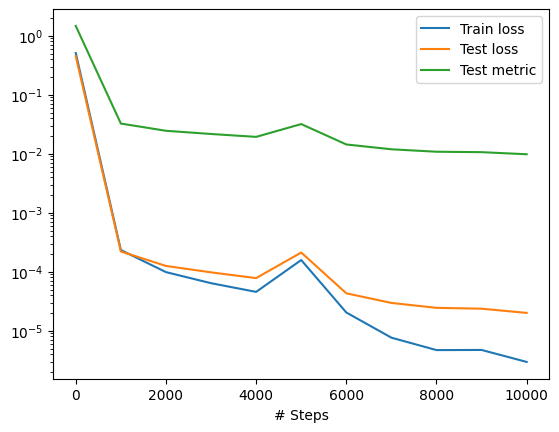

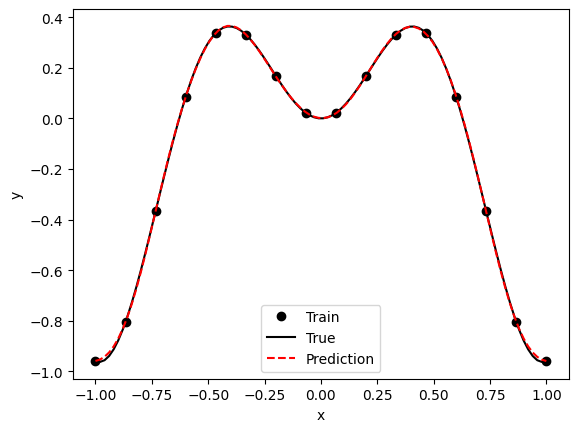

In [2]:

def func(x):
    """
    x: array_like, N x D_in
    y: array_like, N x D_out
    """
    return x * np.sin(5 * x)


geom = dde.geometry.Interval(-1, 1)
num_train = 16
num_test = 100
data = dde.data.Function(geom, func, num_train, num_test)

activation = "tanh"
initializer = "Glorot uniform"
net = dde.nn.FNN([1] + [20] * 3 + [1], activation, initializer)

model = dde.Model(data, net)
model.compile("adam", lr=0.001, metrics=["l2 relative error"])
losshistory, train_state = model.train(iterations=10000)

dde.saveplot(losshistory, train_state, issave=True, isplot=True)

Saving loss history to /home/user/pinn/examples/loss.dat ...
Saving training data to /home/user/pinn/examples/train.dat ...
Saving test data to /home/user/pinn/examples/test.dat ...


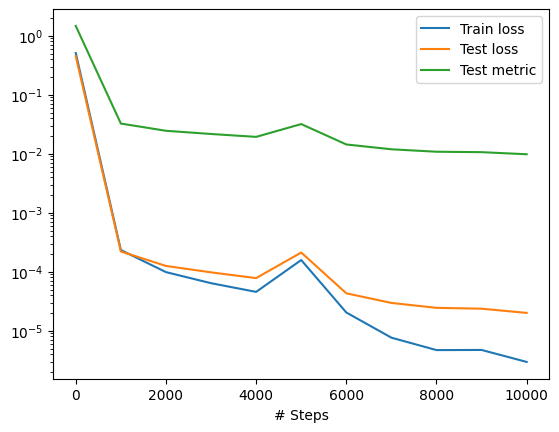

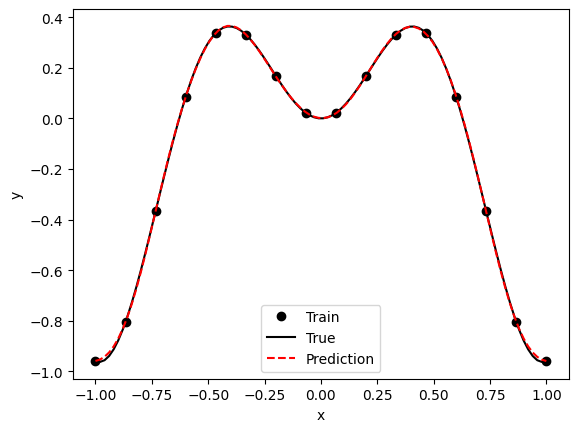

In [4]:
fname_train = "./dataset/dataset.train"
fname_test = "./dataset/dataset.test"

data = dde.data.DataSet(
    fname_train=fname_train,
    fname_test=fname_test,
    col_x=(0,),
    col_y=(1,),
    standardize=True,
)

layer_size = [1] + [50] * 3 + [1]
activation = "tanh"
initializer = "Glorot normal"
net = dde.nn.FNN(layer_size, activation, initializer)

dde.saveplot(losshistory, train_state, issave=True, isplot=True)

Compiling model...
Building feed-forward neural network...
'build' took 0.078946 s



/home/user/mambaforge/envs/deepxd/lib/python3.8/site-packages/deepxde/nn/tensorflow_compat_v1/fnn.py:116: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  return tf.layers.dense(
/home/user/mambaforge/envs/deepxd/lib/python3.8/site-packages/keras/legacy_tf_layers/core.py:255: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  return layer.apply(inputs)


'compile' took 0.472718 s

Training model...

Step      Train loss                                  Test loss                                   Test metric   
0         [2.04e-02, 1.25e-01, 0.00e+00, 1.00e+00]    [1.88e-02, 1.29e-01, 0.00e+00, 1.00e+00]    [1.02e+00]    
1000      [8.22e-03, 7.07e-03, 6.77e-09, 2.96e-04]    [9.28e-03, 7.01e-03, 6.77e-09, 2.96e-04]    [7.74e-01]    
2000      [5.83e-03, 4.27e-03, 9.83e-07, 1.26e-04]    [6.02e-03, 4.45e-03, 9.83e-07, 1.26e-04]    [6.20e-01]    
3000      [2.62e-03, 3.08e-03, 1.40e-06, 4.97e-05]    [2.71e-03, 3.14e-03, 1.40e-06, 4.97e-05]    [4.28e-01]    
4000      [3.75e-04, 4.12e-04, 6.54e-05, 1.08e-05]    [3.80e-04, 3.15e-04, 6.54e-05, 1.08e-05]    [1.12e-01]    
5000      [4.38e-05, 1.51e-05, 1.48e-08, 3.41e-08]    [3.37e-05, 1.71e-05, 1.48e-08, 3.41e-08]    [1.42e-02]    
6000      [9.82e-05, 5.17e-05, 3.71e-05, 2.45e-07]    [9.57e-05, 5.01e-05, 3.71e-05, 2.45e-07]    [1.17e-02]    
7000      [6.50e-06, 4.72e-06, 3.66e-09, 5.46e-10]

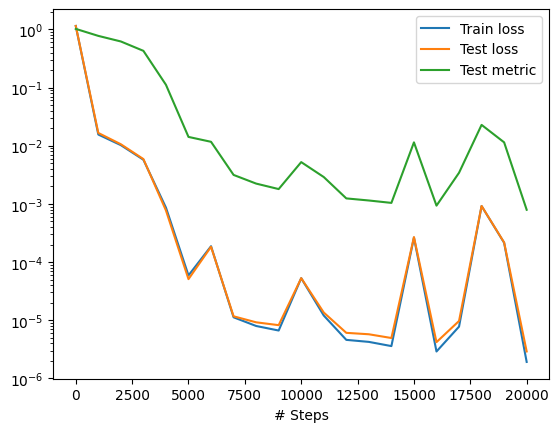

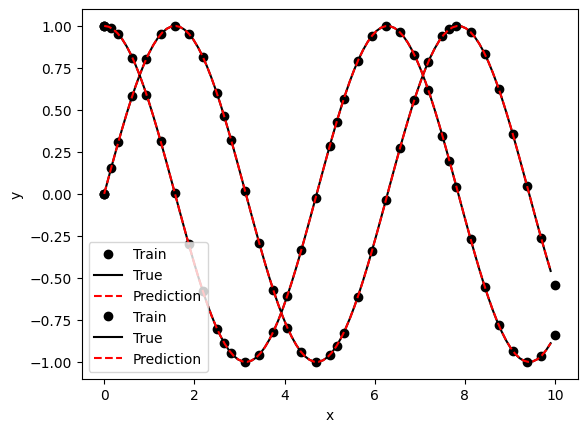

In [5]:


def ode_system(x, y):
    """ODE system.
    dy1/dx = y2
    dy2/dx = -y1
    """
    # Most backends
    y1, y2 = y[:, 0:1], y[:, 1:]
    dy1_x = dde.grad.jacobian(y, x, i=0)
    dy2_x = dde.grad.jacobian(y, x, i=1)
    # Backend jax
    # y_val, y_fn = y
    # y1, y2 = y_val[:, 0:1], y_val[:, 1:]
    # dy1_x, _ = dde.grad.jacobian(y, x, i=0)
    # dy2_x, _ = dde.grad.jacobian(y, x, i=1)
    return [dy1_x - y2, dy2_x + y1]


def boundary(_, on_initial):
    return on_initial


def func(x):
    """
    y1 = sin(x)
    y2 = cos(x)
    """
    return np.hstack((np.sin(x), np.cos(x)))


geom = dde.geometry.TimeDomain(0, 10)
ic1 = dde.icbc.IC(geom, lambda x: 0, boundary, component=0)
ic2 = dde.icbc.IC(geom, lambda x: 1, boundary, component=1)
data = dde.data.PDE(geom, ode_system, [ic1, ic2], 35, 2, solution=func, num_test=100)

layer_size = [1] + [50] * 3 + [2]
activation = "tanh"
initializer = "Glorot uniform"
net = dde.nn.FNN(layer_size, activation, initializer)

model = dde.Model(data, net)
model.compile("adam", lr=0.001, metrics=["l2 relative error"])
losshistory, train_state = model.train(iterations=20000)

dde.saveplot(losshistory, train_state, issave=True, isplot=True)

Compiling model...
Building feed-forward neural network...
'build' took 0.074809 s



/home/user/mambaforge/envs/deepxd/lib/python3.8/site-packages/deepxde/nn/tensorflow_compat_v1/fnn.py:116: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  return tf.layers.dense(
/home/user/mambaforge/envs/deepxd/lib/python3.8/site-packages/keras/legacy_tf_layers/core.py:255: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  return layer.apply(inputs)


'compile' took 0.570499 s

Training model...

0         [1.41e-02, 6.80e-01, 0.00e+00, 0.00e+00][1.41e-02, 6.80e-01, 0.00e+00, 0.00e+00][]  
1000      [4.53e-05, 2.97e-05, 3.12e-07, 3.28e-08][4.53e-05, 2.97e-05, 3.12e-07, 3.28e-08][]  
2000      [2.29e-06, 6.07e-06, 5.68e-08, 2.93e-08][2.29e-06, 6.07e-06, 5.68e-08, 2.93e-08][]  
3000      [3.50e-06, 4.07e-05, 2.17e-05, 1.11e-07][3.50e-06, 4.07e-05, 2.17e-05, 1.11e-07][]  
4000      [4.08e-07, 3.86e-06, 5.44e-09, 1.82e-09][4.08e-07, 3.86e-06, 5.44e-09, 1.82e-09][]  
5000      [5.56e-07, 5.23e-06, 3.97e-08, 5.04e-09][5.56e-07, 5.23e-06, 3.97e-08, 5.04e-09][]  

Best model at step 4000:
  train loss: 4.27e-06
  test loss: 4.27e-06
  test metric: []

'train' took 6.625906 s



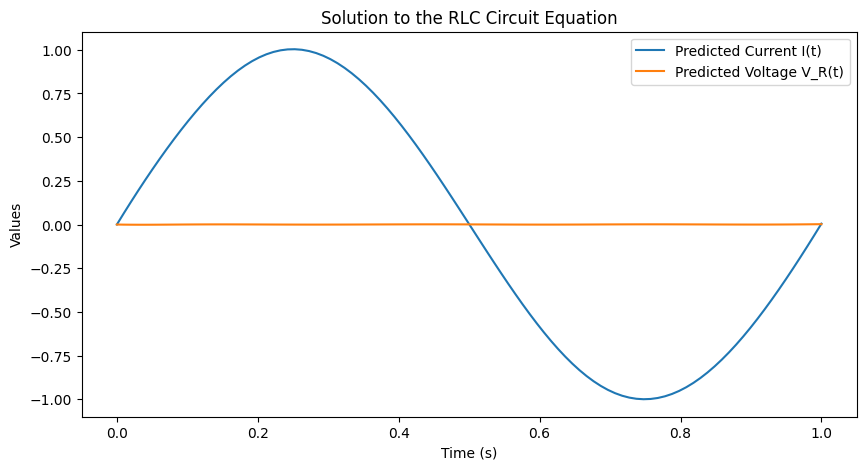

In [8]:
import deepxde as dde
import numpy as np
import tensorflow as tf

# RLC circuit parameters
L = 1.0     # Inductance in Henry
R = 1.0     # Resistance in Ohm
C = 1.0     # Capacitance in Farad

# Define the input voltage as a function of time (e.g., a constant or sinusoidal input)
def V_in(t):
    return tf.sin(2 * np.pi * t)  # Example of sinusoidal input with frequency 1 Hz

# Define the system of first-order ODEs for the RLC circuit
def rlc_system(t, y):
    I = y[:, 0:1]  # Current I(t)
    V_R = y[:, 1:2]  # Derivative of I(t), which represents V_R(t)
    
    # System of equations
    dI_dt = V_R
    dV_R_dt = (V_in(t) - R * V_R - (1 / C) * I) / L
    return [dI_dt, dV_R_dt]

# Initial conditions
def initial_condition(x):
    I_0 = 0.0  # Initial current
    V_R_0 = 0.0  # Initial derivative of current (initial voltage across resistor)
    return np.array([I_0, V_R_0])

# Set up the geometry and time domain for the problem
geom = dde.geometry.TimeDomain(0, 1)  # Time domain from t=0 to t=1 second

# Define the PDE problem with DeepXDE
ic1 = dde.IC(geom, lambda x: initial_condition(x)[0], lambda _, on_initial: on_initial, component=0)
ic2 = dde.IC(geom, lambda x: initial_condition(x)[1], lambda _, on_initial: on_initial, component=1)
data = dde.data.PDE(
    geom,
    rlc_system,
    [ic1, ic2],
    num_domain=100,
    num_boundary=2,
)

# Define the neural network
net = dde.maps.FNN([1] + [50] * 3 + [2], "tanh", "Glorot uniform")

# Define the model and compile
model = dde.Model(data, net)
model.compile("adam", lr=0.001)

# Train the model
losshistory, train_state = model.train(epochs=5000)

# Prediction
t_values = np.linspace(0, 1, 100).reshape(-1, 1)
predicted = model.predict(t_values)

# Display results
I_pred = predicted[:, 0]  # Predicted current I(t)
V_R_pred = predicted[:, 1]  # Predicted V_R(t)

# Plotting
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(t_values, I_pred, label="Predicted Current I(t)")
plt.plot(t_values, V_R_pred, label="Predicted Voltage V_R(t)")
plt.xlabel("Time (s)")
plt.ylabel("Values")
plt.legend()
plt.title("Solution to the RLC Circuit Equation")
plt.show()


In [7]:

# Define the BSDE terminal condition and dynamics
def bsde_driver(t, y, z):
    """Define the driver function f(s, Y(s), Z(s)) of the BSDE."""
    return -y + z

def terminal_condition(X):
    """Define the terminal condition Y(T) = ξ."""
    return tf.reduce_sum(X, axis=1, keepdims=True)

# Parameters for the BSDE
T = 1.0          # Terminal time
N = 50           # Number of time steps
d = 1            # Dimensionality of the Brownian motion

# Define the time points
time_points = np.linspace(0, T, N + 1)

# Set up the BSDE
bsde = dde.BSDE(
    final_time=T,
    dim=d,
    N=N,
    M=1000,  # Number of trajectories (samples)
    drift=None,
    volatility=lambda t, y: 0.1 * np.ones(d),
    driver=bsde_driver,
    terminal_condition=terminal_condition,
    time_points=time_points,
)

# Define the neural network
net = dde.nn.FNN([d + 1] + [50] * 3 + [d + 1], "tanh", "Glorot uniform")

# Define the model
model = dde.Model(bsde, net)

# Define the optimizer and train
model.compile("adam", lr=1e-3)
model.train(epochs=10000)

# Evaluate the solution
Y_0, Z_0 = model.predict(np.array([[0.0]]))  # Prediction at initial time t = 0
print("Predicted Y_0:", Y_0)
print("Predicted Z_0:", Z_0)


AttributeError: module 'deepxde' has no attribute 'BSDE'

Compiling model...
Building feed-forward neural network...
'build' took 0.097472 s



/home/user/mambaforge/envs/deepxd/lib/python3.8/site-packages/deepxde/nn/tensorflow_compat_v1/fnn.py:116: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  return tf.layers.dense(
/home/user/mambaforge/envs/deepxd/lib/python3.8/site-packages/keras/legacy_tf_layers/core.py:255: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  return layer.apply(inputs)


'compile' took 0.689760 s

Training model...

Step      Train loss                                                      Test loss                                                       Test metric
0         [5.28e-02, 5.34e-01, nan, 1.00e+00, 0.00e+00, 0.00e+00]         [5.28e-02, 5.34e-01, nan, 1.00e+00, 0.00e+00, 0.00e+00]         []  

Best model at step 0:
  train loss: inf
  test loss: inf
  test metric: 

'train' took 0.825722 s



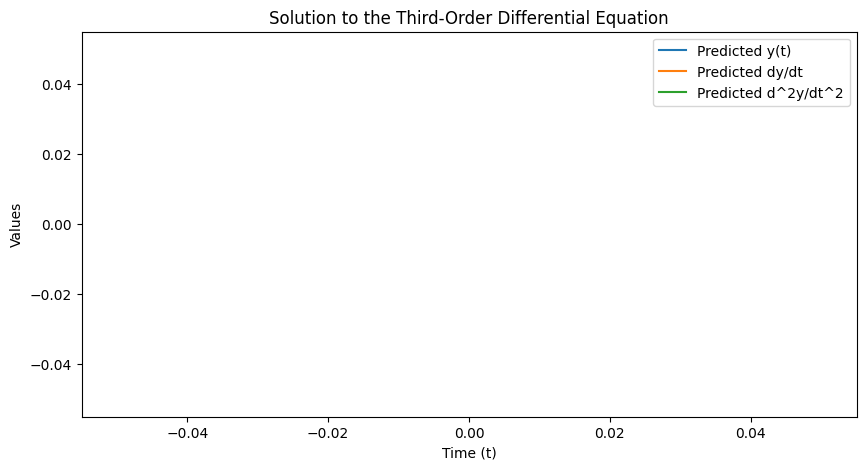

In [9]:

import tensorflow as tf

# Define the parameters
a = 1.0  # Example value for a
b = 1.0  # Example value for b
c = 1.0  # Example value for c

# Define the system of equations
def third_order_system(t, y):
    u1, u2, u3 = y[:, 0:1], y[:, 1:2], y[:, 2:3]

    # First-order equations
    du1_dt = u2
    du2_dt = u3
    du3_dt = -a * (t**2 - 2.71 * u1 / t) * u3 + b * t / u1 + c * (tf.sin(2 * t) + tf.cos(2 * t))
    
    return [du1_dt, du2_dt, du3_dt]

# Initial conditions
def initial_condition_u1(x):
    return 1.0  # Initial value of y(0)

def initial_condition_u2(x):
    return 0.0  # Initial value of dy/dt at t=0

def initial_condition_u3(x):
    return 0.0  # Initial value of d^2y/dt^2 at t=0

# Set up the time domain for the problem
geom = dde.geometry.TimeDomain(0, 10)  # Solve from t=0 to t=10

# Define the initial conditions for u1, u2, and u3
ic1 = dde.IC(geom, lambda x: initial_condition_u1(x), lambda _, on_initial: on_initial, component=0)
ic2 = dde.IC(geom, lambda x: initial_condition_u2(x), lambda _, on_initial: on_initial, component=1)
ic3 = dde.IC(geom, lambda x: initial_condition_u3(x), lambda _, on_initial: on_initial, component=2)

# Define the PDE problem with DeepXDE
data = dde.data.PDE(
    geom,
    third_order_system,
    [ic1, ic2, ic3],
    num_domain=400,
    num_boundary=2,
)

# Define the neural network
net = dde.maps.FNN([1] + [50] * 3 + [3], "tanh", "Glorot uniform")

# Define the model and compile
model = dde.Model(data, net)
model.compile("adam", lr=0.001)

# Train the model
losshistory, train_state = model.train(epochs=5000)

# Prediction
t_values = np.linspace(0, 10, 100).reshape(-1, 1)
predicted = model.predict(t_values)

# Extract predictions
y_pred = predicted[:, 0]  # Predicted y(t)
dy_dt_pred = predicted[:, 1]  # Predicted dy/dt
d2y_dt2_pred = predicted[:, 2]  # Predicted d^2y/dt^2

# Plotting the results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(t_values, y_pred, label="Predicted y(t)")
plt.plot(t_values, dy_dt_pred, label="Predicted dy/dt")
plt.plot(t_values, d2y_dt2_pred, label="Predicted d^2y/dt^2")
plt.xlabel("Time (t)")
plt.ylabel("Values")
plt.legend()
plt.title("Solution to the Third-Order Differential Equation")
plt.show()


In [10]:
import deepxde as dde
import numpy as np
import tensorflow as tf

# Define the parameters
L = 1.0  # Assume unit length for the spatial domain

# Define the 3D wave equation in DeepXDE
def wave_3d(x, u):
    """The 3D wave equation: ∂²u/∂t² - Δu = 0"""
    u_tt = dde.grad.hessian(u, x, i=3, j=3)  # Second derivative with respect to t
    u_xx = dde.grad.hessian(u, x, i=0, j=0)  # Second derivative with respect to x
    u_yy = dde.grad.hessian(u, x, i=1, j=1)  # Second derivative with respect to y
    u_zz = dde.grad.hessian(u, x, i=2, j=2)  # Second derivative with respect to z
    return u_tt - (u_xx + u_yy + u_zz)

# Initial conditions
def initial_condition_u(x):
    """Initial displacement at t=0 (can be a Gaussian or zero function)"""
    return np.exp(-((x[:, 0:1] - 0.5)**2 + (x[:, 1:2] - 0.5)**2 + (x[:, 2:3] - 0.5)**2) / 0.02)

def initial_condition_ut(x):
    """Initial velocity at t=0"""
    return np.zeros((len(x), 1))

# Define the domain for (x, y, z) and time t
spatial_domain = dde.geometry.Cuboid([0, 0, 0], [L, L, L])  # 3D spatial domain
time_domain = dde.geometry.TimeDomain(0, 1)  # Solve from t=0 to t=1
geomtime = dde.geometry.GeometryXTime(spatial_domain, time_domain)

# Set the initial and boundary conditions
ic_u = dde.IC(geomtime, initial_condition_u, lambda _, on_initial: on_initial, component=0)  # u(x,y,z,0)
ic_ut = dde.IC(geomtime, initial_condition_ut, lambda _, on_initial: on_initial, component=1)  # du/dt(x,y,z,0)

# Boundary condition: assume Dirichlet boundary (u=0 at boundary)
bc = dde.DirichletBC(geomtime, lambda x: 0, lambda _, on_boundary: on_boundary)

# Define the PDE problem
data = dde.data.TimePDE(
    geomtime,
    wave_3d,
    [ic_u, ic_ut, bc],
    num_domain=10000,
    num_boundary=2000,
    num_initial=2000,
)

# Define the neural network
net = dde.maps.FNN([4] + [50] * 3 + [1], "tanh", "Glorot uniform")

# Define the model and compile
model = dde.Model(data, net)
model.compile("adam", lr=0.001)

# Train the model
losshistory, train_state = model.train(epochs=5000)

# Prediction
t_values = np.linspace(0, 1, 100).reshape(-1, 1)
x_values = np.linspace(0, L, 10).reshape(-1, 1)
y_values = np.linspace(0, L, 10).reshape(-1, 1)
z_values = np.linspace(0, L, 10).reshape(-1, 1)

# Generating grid for prediction
X, Y, Z, T = np.meshgrid(x_values, y_values, z_values, t_values)
pred_input = np.hstack((X.flatten()[:, None], Y.flatten()[:, None], Z.flatten()[:, None], T.flatten()[:, None]))
pred_output = model.predict(pred_input)

# Reshape and plot results if needed
import matplotlib.pyplot as plt

# Example: plotting the solution at t = 0.5
t_index = np.where(np.isclose(t_values, 0.5))[0][0]
u_pred = pred_output[t_index::len(t_values)]  # Select only the t=0.5 slice

plt.imshow(u_pred.reshape(10, 10), extent=(0, L, 0, L), origin="lower", cmap="viridis")
plt.colorbar(label="u(x,y,z) at t=0.5")
plt.xlabel("x")
plt.ylabel("y")
plt.title("3D Wave Equation Solution Slice at z=0 and t=0.5")
plt.show()


Compiling model...
Building feed-forward neural network...
'build' took 0.062279 s



/home/user/mambaforge/envs/deepxd/lib/python3.8/site-packages/deepxde/nn/tensorflow_compat_v1/fnn.py:116: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  return tf.layers.dense(
/home/user/mambaforge/envs/deepxd/lib/python3.8/site-packages/keras/legacy_tf_layers/core.py:255: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  return layer.apply(inputs)


'compile' took 1.154318 s

Training model...

Step      Train loss                                  Test loss                                   Test metric
0         [6.56e-03, 2.51e-02, nan, 4.93e-02]         [6.56e-03, 2.51e-02, nan, 4.93e-02]         []  

Best model at step 0:
  train loss: inf
  test loss: inf
  test metric: 

'train' took 2.018277 s



IndexError: index 0 is out of bounds for axis 0 with size 0

In [11]:
import deepxde as dde
import numpy as np
import tensorflow as tf

# Define the parameters
L = 1.0  # Assume unit length for the spatial domain

# Define the 3D wave equation in DeepXDE
def wave_3d(x, u):
    """The 3D wave equation: ∂²u/∂t² - Δu = 0"""
    u_tt = dde.grad.hessian(u, x, i=3, j=3)  # Second derivative with respect to t
    u_xx = dde.grad.hessian(u, x, i=0, j=0)  # Second derivative with respect to x
    u_yy = dde.grad.hessian(u, x, i=1, j=1)  # Second derivative with respect to y
    u_zz = dde.grad.hessian(u, x, i=2, j=2)  # Second derivative with respect to z
    return u_tt - (u_xx + u_yy + u_zz)

# Initial conditions
def initial_condition_u(x):
    """Initial displacement at t=0 (can be a Gaussian or zero function)"""
    return np.exp(-((x[:, 0:1] - 0.5)**2 + (x[:, 1:2] - 0.5)**2 + (x[:, 2:3] - 0.5)**2) / 0.02)

def initial_condition_ut(x):
    """Initial velocity at t=0"""
    return np.zeros((len(x), 1))

# Define the domain for (x, y, z) and time t
spatial_domain = dde.geometry.Cuboid([0, 0, 0], [L, L, L])  # 3D spatial domain
time_domain = dde.geometry.TimeDomain(0, 1)  # Solve from t=0 to t=1
geomtime = dde.geometry.GeometryXTime(spatial_domain, time_domain)

# Set the initial and boundary conditions
ic_u = dde.IC(geomtime, initial_condition_u, lambda _, on_initial: on_initial, component=0)  # u(x,y,z,0)
ic_ut = dde.IC(geomtime, initial_condition_ut, lambda _, on_initial: on_initial, component=1)  # du/dt(x,y,z,0)

# Boundary condition: assume Dirichlet boundary (u=0 at boundary)
bc = dde.DirichletBC(geomtime, lambda x: 0, lambda _, on_boundary: on_boundary)

# Define the PDE problem
data = dde.data.TimePDE(
    geomtime,
    wave_3d,
    [ic_u, ic_ut, bc],
    num_domain=10000,
    num_boundary=2000,
    num_initial=2000,
)

# Define the neural network
net = dde.maps.FNN([4] + [50] * 3 + [1], "tanh", "Glorot uniform")

# Define the model and compile
model = dde.Model(data, net)
model.compile("adam", lr=0.001)

# Train the model
losshistory, train_state = model.train(epochs=5000)

# Prediction
t_values = np.linspace(0, 1, 100).reshape(-1, 1)
x_values = np.linspace(0, L, 10).reshape(-1, 1)
y_values = np.linspace(0, L, 10).reshape(-1, 1)
z_values = np.linspace(0, L, 10).reshape(-1, 1)

# Generating grid for prediction
X, Y, Z, T = np.meshgrid(x_values, y_values, z_values, t_values)
pred_input = np.hstack((X.flatten()[:, None], Y.flatten()[:, None], Z.flatten()[:, None], T.flatten()[:, None]))
pred_output = model.predict(pred_input)

# Reshape and plot results if needed
import matplotlib.pyplot as plt

# Example: plotting the solution at t = 0.5
t_index = np.where(np.isclose(t_values, 0.5))[0][0]
u_pred = pred_output[t_index::len(t_values)]  # Select only the t=0.5 slice

plt.imshow(u_pred.reshape(10, 10), extent=(0, L, 0, L), origin="lower", cmap="viridis")
plt.colorbar(label="u(x,y,z) at t=0.5")
plt.xlabel("x")
plt.ylabel("y")
plt.title("3D Wave Equation Solution Slice at z=0 and t=0.5")
plt.show()


Compiling model...
Building feed-forward neural network...
'build' took 0.061907 s



/home/user/mambaforge/envs/deepxd/lib/python3.8/site-packages/deepxde/nn/tensorflow_compat_v1/fnn.py:116: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  return tf.layers.dense(
/home/user/mambaforge/envs/deepxd/lib/python3.8/site-packages/keras/legacy_tf_layers/core.py:255: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  return layer.apply(inputs)


'compile' took 1.105856 s

Training model...

Step      Train loss                                  Test loss                                   Test metric
0         [6.52e-03, 5.47e-02, nan, 1.25e-01]         [6.52e-03, 5.47e-02, nan, 1.25e-01]         []  

Best model at step 0:
  train loss: inf
  test loss: inf
  test metric: 

'train' took 2.079795 s



IndexError: index 0 is out of bounds for axis 0 with size 0